# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Generate Cities List

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# Import API key
from api_keys import weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# Output File (CSV)
output_data_file = "output_data/cities.csv"
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [22]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
responce=requests.get(query_url+"london").json()
responce


{'coord': {'lon': -0.13, 'lat': 51.51},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 54.55,
  'feels_like': 43.27,
  'temp_min': 53.01,
  'temp_max': 55.99,
  'pressure': 1020,
  'humidity': 58},
 'visibility': 10000,
 'wind': {'speed': 16.11, 'deg': 90},
 'clouds': {'all': 0},
 'dt': 1588618398,
 'sys': {'type': 1,
  'id': 1414,
  'country': 'GB',
  'sunrise': 1588566366,
  'sunset': 1588620501},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
citydata=[]
i=0
for city in cities:
    json=requests.get(query_url+city).json()
    i=i+1
    try:
        tempmax=json["main"]['temp_max']
        humidity=json["main"]["humidity"]
        speed=json['wind']["speed"]
        cloudiness=json["clouds"]["all"]
        lat=json["coord"]["lat"]
        country=json['sys']["country"]
        date=json['dt']
        lon=json["coord"]["lon"]
        citydata.append([city,cloudiness,country,date,humidity,lat,lon,tempmax,speed])
        print(f"{i}  {city}")
        time.sleep(.2)
    except:
        print("city not found")

1  punta arenas
2  blagoyevo
3  arraial do cabo
4  port alfred
city not found
6  varkaus
7  chokurdakh
8  cape town
9  sobolevo
city not found
11  albany
12  cidreira
13  harper
14  vaini
15  georgetown
16  haines junction
17  college
18  vezirkopru
19  mamlyutka
20  saint anthony
21  hobart
22  atuona
23  omsukchan
24  bredasdorp
25  dutse
26  nikolskoye
27  port hardy
28  jamestown
29  faya
30  puerto ayora
31  chuy
32  cayambe
33  collie
34  yellowknife
35  barrow
36  airai
37  busselton
38  tiksi
39  tshikapa
city not found
41  sao filipe
42  broome
43  sarangani
44  sijunjung
45  thompson
46  mahebourg
47  perumpavur
48  ushuaia
49  little current
50  pullman
51  saldanha
52  moengo
53  bac lieu
54  kapaa
55  hermanus
city not found
57  hithadhoo
58  hay river
city not found
60  ladesti
61  tasiilaq
62  samarai
63  kodiak
64  juegang
65  tuktoyaktuk
66  ilulissat
67  sorland
city not found
69  kruisfontein
70  mataura
71  hilo
72  bluff
city not found
74  santa vitoria do palmar
7

In [24]:
df=pd.DataFrame(citydata,columns=["City","Cloudiness","Country", "Date","Humidity","Lat","Lng","Max Temp","Wind Speed"])
df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,punta arenas,15,CL,1588618806,57,-53.15,-70.92,48.20,11.41
1,blagoyevo,100,RU,1588618849,91,63.37,47.92,44.73,2.57
2,arraial do cabo,0,BR,1588618805,57,-22.97,-42.03,77.00,6.93
3,port alfred,0,ZA,1588618850,88,-33.59,26.89,61.00,5.01
4,varkaus,3,FI,1588618850,87,62.32,27.87,46.00,2.24
...,...,...,...,...,...,...,...,...,...
550,hornepayne,0,CA,1588619046,54,49.21,-84.77,40.23,7.76
551,rincon,1,US,1588618999,43,32.30,-81.24,90.00,8.05
552,aswan,0,EG,1588619046,12,24.09,32.91,87.19,13.89
553,grand gaube,0,MU,1588619047,75,-20.01,57.66,77.00,7.00


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [25]:
df.to_csv('cities.csv',index=False)

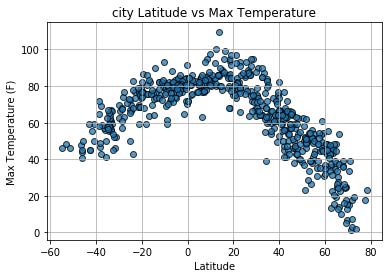

In [26]:
#plt.scatter(df["Lat"],df["Max Temp"],c="lightblue",edgecolor="black")
#plt.title(f"City Latitude vs Max Temperature ")
#plt.ylabel("Max Temprature (F)")
#plt.xlabel("Latitude")
plt.scatter(df['Lat'], df['Max Temp'], alpha= 0.75, marker = 'o', edgecolor = 'black')
plt.title(f'city Latitude vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig('Lat vs Tem.png')
plt.show()

#### Latitude vs. Humidity Plot

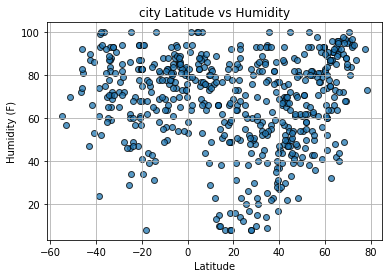

In [27]:
#plt.scatter(df["Lat"],df["Max Temp"],c="lightblue",edgecolor="black")
#plt.title(f"City Latitude vs Max Temperature ")
#plt.ylabel("Max Temprature (F)")
#plt.xlabel("Latitude")
plt.scatter(df['Lat'], df['Humidity'], alpha= 0.75, marker = 'o', edgecolor = 'black')
plt.title(f'city Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (F)')
plt.grid()
plt.savefig('Lat vs Tem.png')
plt.show()

#### Latitude vs. Cloudiness Plot

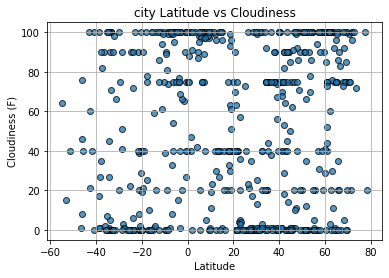

In [28]:
#plt.scatter(df["Lat"],df["Max Temp"],c="lightblue",edgecolor="black")
#plt.title(f"City Latitude vs Max Temperature ")
#plt.ylabel("Max Temprature (F)")
#plt.xlabel("Latitude")
plt.scatter(df['Lat'], df['Cloudiness'], alpha= 0.75, marker = 'o', edgecolor = 'black')
plt.title(f'city Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (F)')
plt.grid()
plt.savefig('Lat vs Tem.png')
plt.show()

#### Latitude vs. Wind Speed Plot

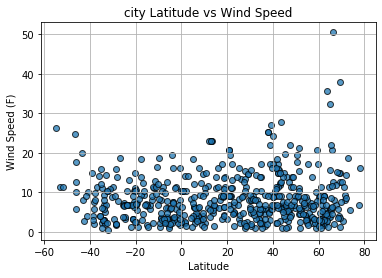

In [10]:
#plt.scatter(df["Lat"],df["Max Temp"],c="lightblue",edgecolor="black")
#plt.title(f"City Latitude vs Max Temperature ")
#plt.ylabel("Max Temprature (F)")
#plt.xlabel("Latitude")
plt.scatter(df['Lat'], df['Wind Speed'], alpha= 0.75, marker = 'o', edgecolor = 'black')
plt.title(f'city Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (F)')
plt.grid()
plt.savefig('Lat vs Tem.png')
plt.show()

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots


In [29]:
# Create Northern and Southern Hemisphere DataFrames
NH = df.loc[df["Lat"]>0]
SH = df.loc[df["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7625965906159743


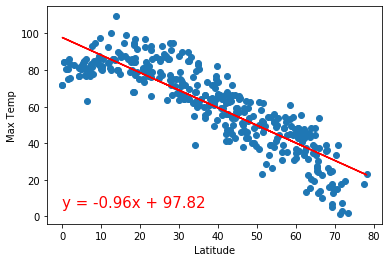

In [30]:
x_values=NH["Lat"]
y_values=NH["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6242609436286592


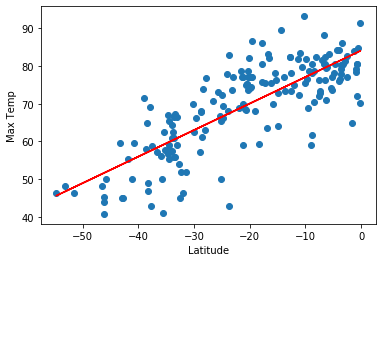

In [31]:
x_values=SH["Lat"]
y_values=SH["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03594614505345924


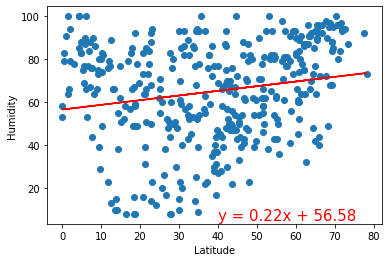

In [32]:
x_values=NH["Lat"]
y_values=NH["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0020854249449265947


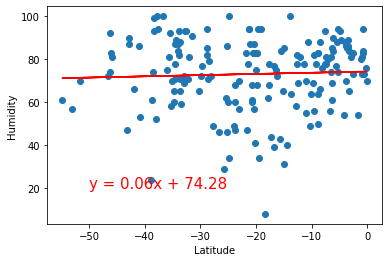

In [33]:
x_values=SH["Lat"]
y_values=SH["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0026059398906614077


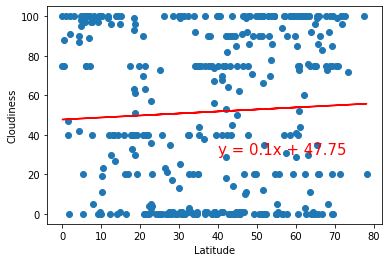

In [17]:
x_values=NH["Lat"]
y_values=NH["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07809798658725815


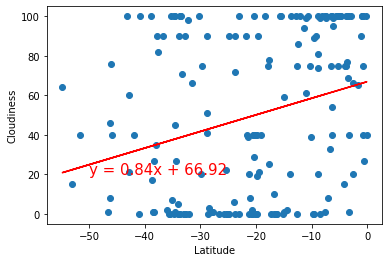

In [34]:
x_values=SH["Lat"]
y_values=SH["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.002062878148188877


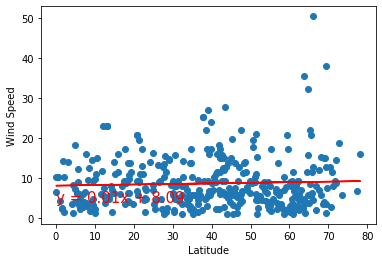

In [35]:
x_values=NH["Lat"]
y_values=NH["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,4),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04703952657757275


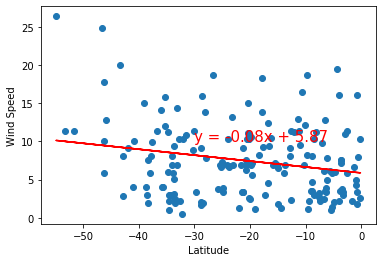

In [20]:
x_values=SH["Lat"]
y_values=SH["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()